In [15]:
%matplotlib inline

%config InlineBackend.figure_formats = {'png','retina'}

스칼라 벡터 미분과 등고선/퀴버플롯


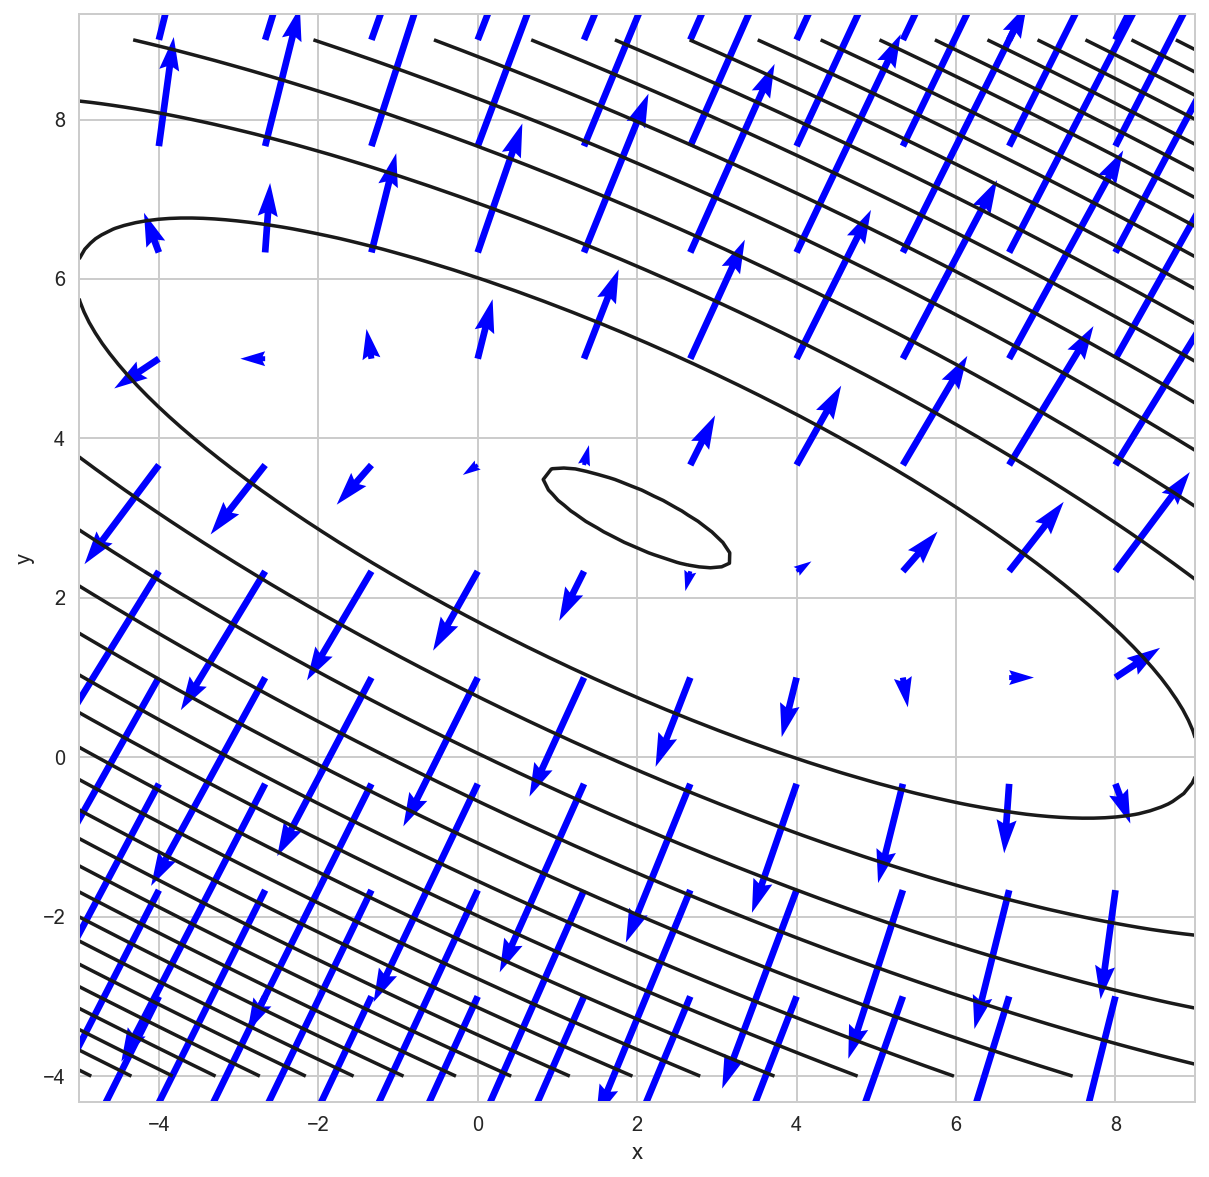

In [18]:
# 스칼라 벡터 미분

print("스칼라 벡터 미분과 등고선/퀴버플롯")

def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)
levels = np.linspace(1,1000,30)
plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=levels, colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=300)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
# 최적화 문제에서 목적함수의 최저점

def f1(x):
    return (x - 2) ** 2 + 2

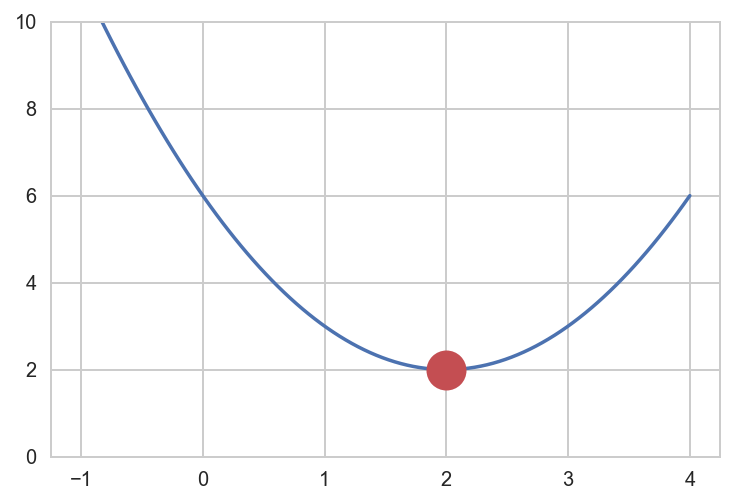

In [22]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=20)
plt.ylim(0, 10)
plt.show()

In [23]:
# 2차원 목적합수의 최소값 위치 (최저점)

def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

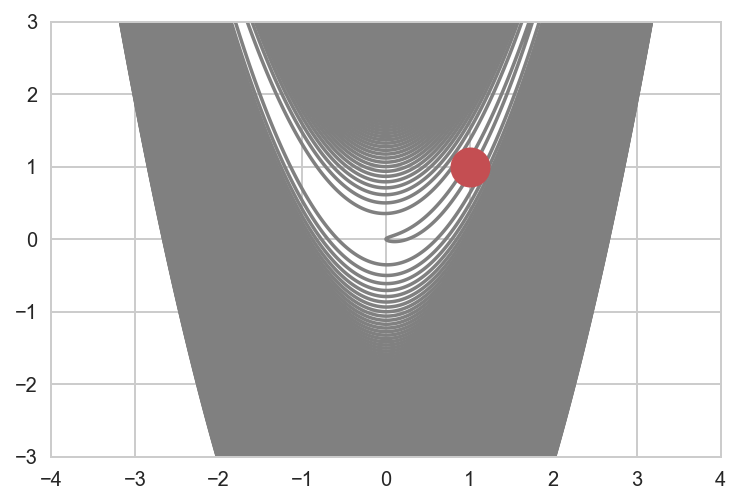

In [31]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.linspace(1,5000,400)
plt.contour(X, Y, Z, colors="gray", levels=levels)
plt.plot(1, 1, 'ro', markersize=20)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

In [32]:
# SGD방법

def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

x = 0, g = -4.0
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014


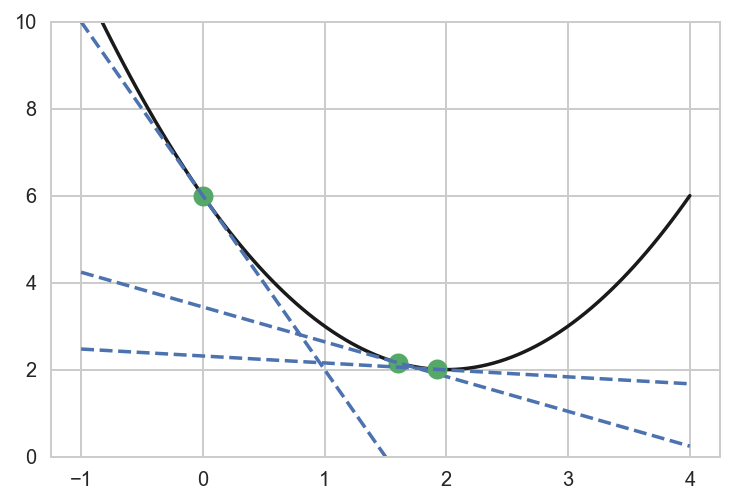

In [34]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size 지정
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
plt.ylim(0, 10)
plt.show()

In [35]:
# 2차원도함수

def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

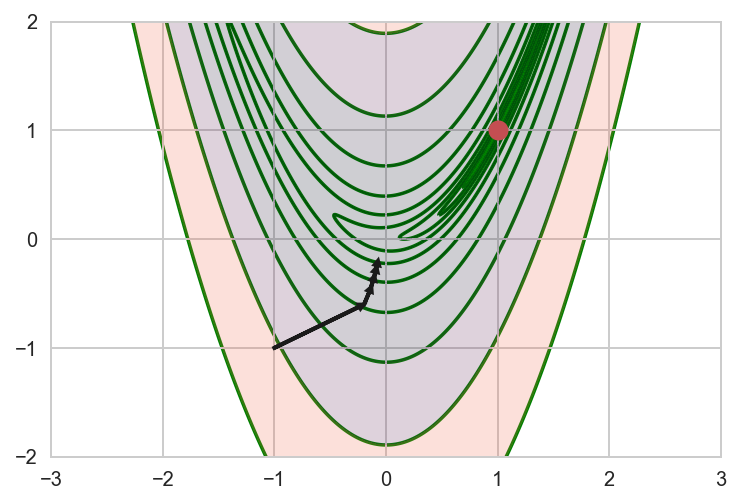

In [46]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 10e-4 # step size
s = 0.95  # for arrowr head drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.show()

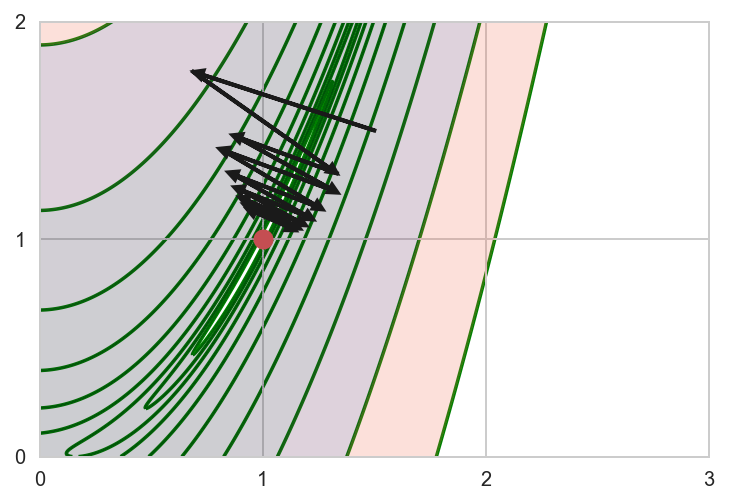

In [47]:
# 계곡형태에서는 진동한다

xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3 # step size
s = 0.95  # for arrowr head drawing

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.show()